In [19]:
import numpy as np
import pymc3 as pm
import matplotlib.pylab as plt
import theano.tensor as tt

%matplotlib inline

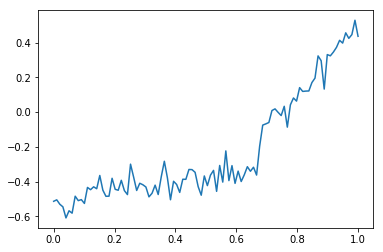

In [20]:
N = 100
x = np.linspace(0, 1, N)
bp = round(N*2/3)
beta = .25, 2.
intept = -.5, -1.5
y = np.hstack([beta[0]*x[:bp]+intept[0],
               beta[1]*x[bp:]+intept[1]]) + np.random.randn(N)*.05

plt.plot(x, y);

In [21]:
def logistic(L, x0, k=N, t=np.linspace(0., 1., N)):
    return L / (1 + tt.exp(-k * (t - x0)))


with pm.Model() as m:
    alphas = pm.Normal('a', 0., 100., shape=2)
    betas = pm.Normal('b', 0., 100., shape=2)
    switchpoints = pm.Beta('switchpoints', 1, 1)
    sd = pm.HalfNormal('sd', 5, shape=2)
    intercept = alphas[0] + logistic(alphas[1], switchpoints)
    slope = betas[0] + logistic(betas[1], switchpoints)
    dev = sd[0] + logistic(sd[1], switchpoints)
    regression = intercept + slope * x
    observed = pm.Normal("observed", mu=regression,
                         sd=dev, observed=y)
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, switchpoints_logodds__, b, a]
100%|██████████| 2000/2000 [00:29<00:00, 67.34it/s]


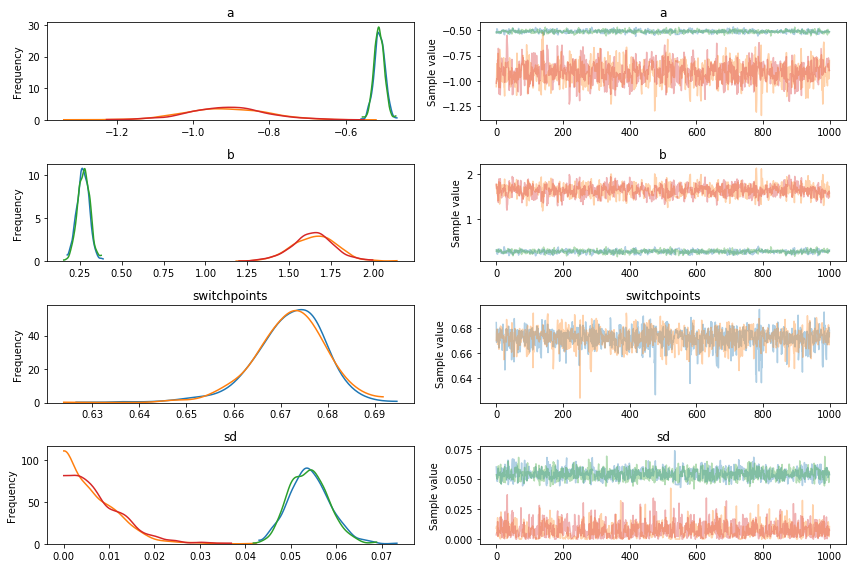

In [22]:
pm.traceplot(trace);